## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.cluster import KMeans
import plotly as py
import plotly.graph_objs as go
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
import textwrap
from itertools import combinations
from collections import Counter


# Retail Dataset

In [2]:
#Reference : https://www.kaggle.com/datasets/abdurraziq01/retail-data
retail_data = pd.read_csv("retail_data.csv")

In [3]:
small_data = retail_data.sample(frac=1)  # Shuffle the DataFrame
small_data = retail_data.iloc[199000:].reset_index(drop=True)

In [4]:
retail_data.head(10)

,CustomerID,Age,Gender,AnnualIncome,SpendingScore,ProductCategory,ProductPrice,PurchaseDate,StoreID,StoreLocation,PaymentMethod,DiscountApplied,DiscountPercent,ProductCost,Profit,FootTraffic,InventoryLevel,MarketingExpenditure,CompetitorPrice
0,1,58,Male,60038,41,Health & Beauty,147.43,2022-06-11,46,San Jose,Credit Card,True,26,109.10,38.33,336,26,9107.90,171.55
1,2,57,Male,31577,91,Health & Beauty,402.09,2023-06-05,53,Los Angeles,Mobile Payment,True,1,398.07,4.02,491,32,1746.77,419.19
2,3,39,Female,117404,26,Groceries,958.45,2020-10-14,95,Philadelphia,Mobile Payment,False,0,958.45,0.00,157,3,2030.49,835.92
3,4,33,Male,87434,94,Electronics,544.17,2021-08-27,24,Dallas,Credit Card,False,0,544.17,0.00,223,87,6242.68,620.36
4,5,18,Male,90225,10,Health & Beauty,645.75,2023-06-06,2,San Antonio,Credit Card,False,0,645.75,0.00,315,8,6008.89,600.49
5,6,27,Female,71051,74,Books,304.15,2022-02-05,93,San Diego,Debit Card,False,0,304.15,0.00,706,71,4022.86,309.40
6,7,18,Male,116056,77,Health & Beauty,629.44,2023-05-30,83,San Jose,Cash,False,0,629.44,0.00,796,82,9973.90,614.19
7,8,19,Male,116897,7,Electronics,57.43,2022-12-16,61,Los Angeles,Cash,False,0,57.43,0.00,642,28,1940.60,62.94
8,9,70,Female,140969,62,Electronics,237.60,2022-02-11,61,San Jose,Credit Card,True,15,201.96,35.64,225,77,5527.31,240.68
9,10,27,Female,140161,26,Books,573.09,2021-02-12,69,San Diego,Online Transfer,True,29,406.89,166.20,590,22,7719.62,531.00


In [5]:
retail_data.describe

<bound method NDFrame.describe of         CustomerID  Age  Gender  AnnualIncome  SpendingScore  ProductCategory  \
0                1   58    Male         60038             41  Health & Beauty   
1                2   57    Male         31577             91  Health & Beauty   
2                3   39  Female        117404             26        Groceries   
3                4   33    Male         87434             94      Electronics   
4                5   18    Male         90225             10  Health & Beauty   
...            ...  ...     ...           ...            ...              ...   
199995      199996   56    Male         21330              3        Groceries   
199996      199997   35  Female        100374             45         Clothing   
199997      199998   49    Male         42793             73            Books   
199998      199999   67  Female         47549             81      Electronics   
199999      200000   51  Female        132210             84  Health & Beau

In [6]:
retail_data.isnull().sum()

CustomerID              0
Age                     0
Gender                  0
AnnualIncome            0
SpendingScore           0
ProductCategory         0
ProductPrice            0
PurchaseDate            0
StoreID                 0
StoreLocation           0
PaymentMethod           0
DiscountApplied         0
DiscountPercent         0
ProductCost             0
Profit                  0
FootTraffic             0
InventoryLevel          0
MarketingExpenditure    0
CompetitorPrice         0
dtype: int64

In [7]:
retail_data.columns

Index(['CustomerID', 'Age', 'Gender', 'AnnualIncome', 'SpendingScore',
       'ProductCategory', 'ProductPrice', 'PurchaseDate', 'StoreID',
       'StoreLocation', 'PaymentMethod', 'DiscountApplied', 'DiscountPercent',
       'ProductCost', 'Profit', 'FootTraffic', 'InventoryLevel',
       'MarketingExpenditure', 'CompetitorPrice'],
      dtype='object')

In [8]:
retail_data.dtypes

CustomerID                int64
Age                       int64
Gender                   object
AnnualIncome              int64
SpendingScore             int64
ProductCategory          object
ProductPrice            float64
PurchaseDate             object
StoreID                   int64
StoreLocation            object
PaymentMethod            object
DiscountApplied            bool
DiscountPercent           int64
ProductCost             float64
Profit                  float64
FootTraffic               int64
InventoryLevel            int64
MarketingExpenditure    float64
CompetitorPrice         float64
dtype: object

In [9]:
retail_data['PurchaseDate'] = pd.to_datetime(retail_data['PurchaseDate'])

In [10]:
retail_data['Month'] = retail_data['PurchaseDate'].dt.month_name()
retail_data['Year'] = retail_data['PurchaseDate'].dt.year

In [11]:
retail_data.head()

,CustomerID,Age,Gender,AnnualIncome,SpendingScore,ProductCategory,ProductPrice,PurchaseDate,StoreID,StoreLocation,...,DiscountApplied,DiscountPercent,ProductCost,Profit,FootTraffic,InventoryLevel,MarketingExpenditure,CompetitorPrice,Month,Year
0,1,58,Male,60038,41,Health & Beauty,147.43,2022-06-11,46,San Jose,...,True,26,109.10,38.33,336,26,9107.90,171.55,June,2022
1,2,57,Male,31577,91,Health & Beauty,402.09,2023-06-05,53,Los Angeles,...,True,1,398.07,4.02,491,32,1746.77,419.19,June,2023
2,3,39,Female,117404,26,Groceries,958.45,2020-10-14,95,Philadelphia,...,False,0,958.45,0.00,157,3,2030.49,835.92,October,2020
3,4,33,Male,87434,94,Electronics,544.17,2021-08-27,24,Dallas,...,False,0,544.17,0.00,223,87,6242.68,620.36,August,2021
4,5,18,Male,90225,10,Health & Beauty,645.75,2023-06-06,2,San Antonio,...,False,0,645.75,0.00,315,8,6008.89,600.49,June,2023


In [12]:
print(retail_data['Age'].nunique())
print(retail_data['Age'].unique())

53
[58 57 39 33 18 27 19 70 23 32 55 38 31 28 30 45 47 67 21 69 52 40 41 63
 59 56 49 36 64 26 68 43 62 22 24 25 53 51 61 35 54 65 29 48 34 20 37 50
 42 44 46 60 66]


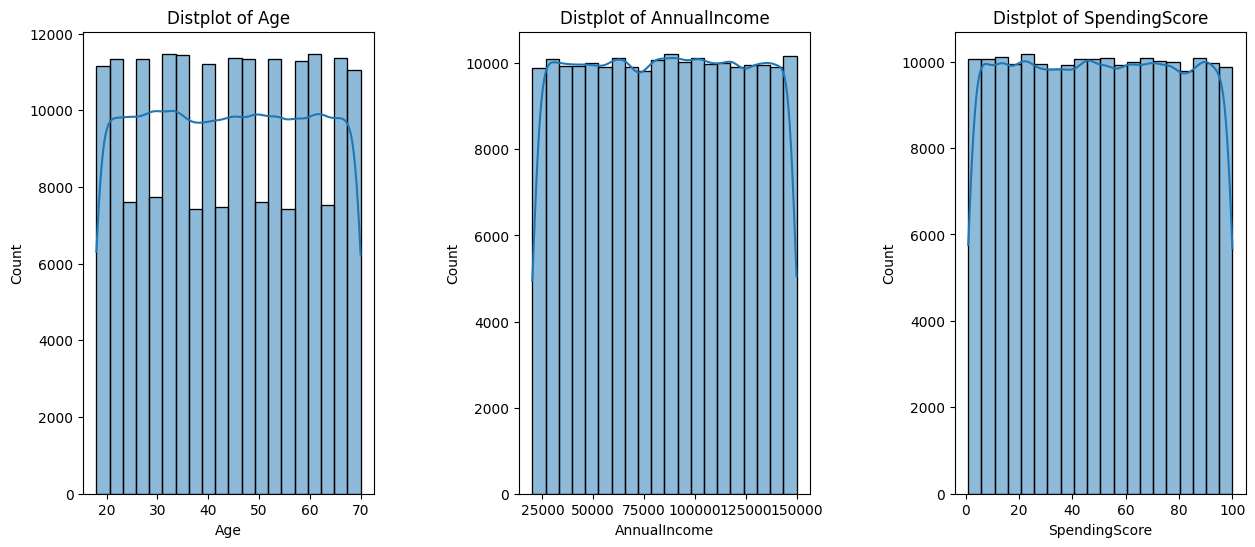

In [13]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'AnnualIncome' , 'SpendingScore']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(retail_data[x] , bins = 20, kde=True)
    plt.title('Distplot of {}'.format(x))
plt.show()

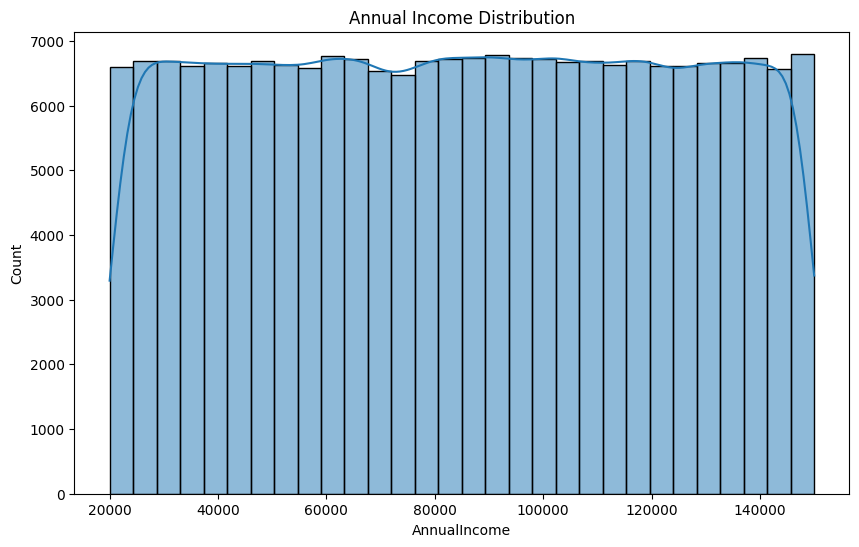

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(retail_data['AnnualIncome'], bins=30, kde=True)
plt.title("Annual Income Distribution")
plt.show()

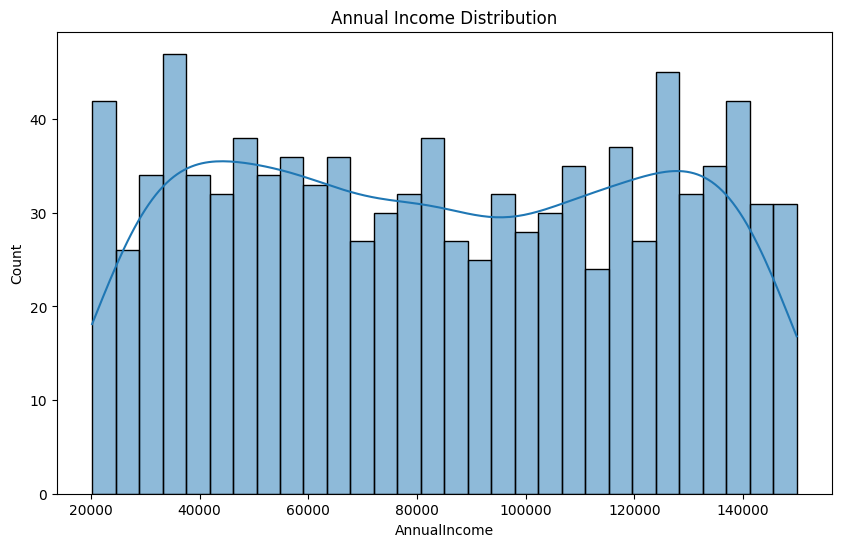

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(small_data['AnnualIncome'], bins=30, kde=True)
plt.title("Annual Income Distribution")
plt.show()

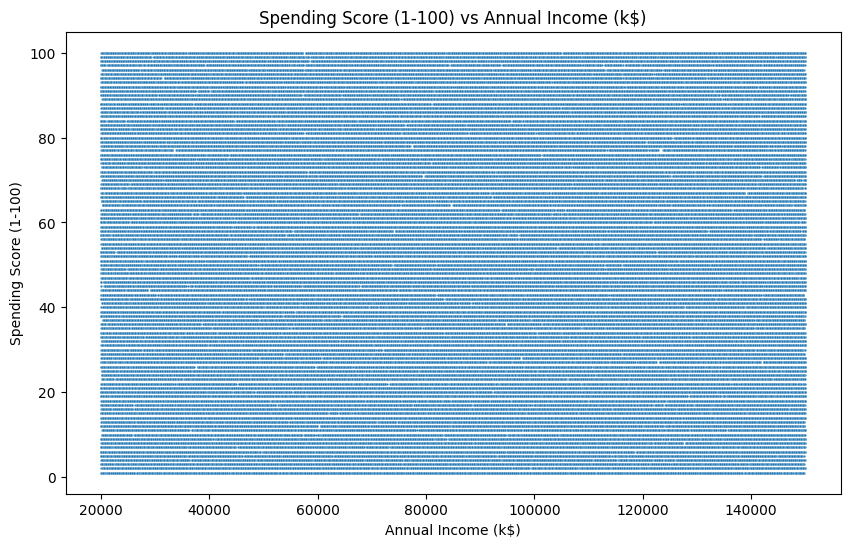

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'AnnualIncome',y = 'SpendingScore',  data = retail_data[["AnnualIncome", "SpendingScore"]]  ,s = 3 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

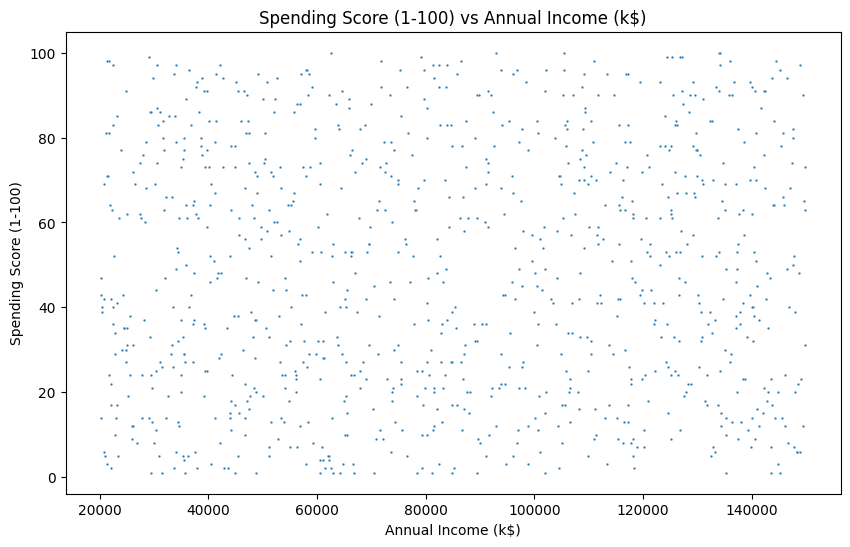

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'AnnualIncome',y = 'SpendingScore',  data = small_data[["AnnualIncome", "SpendingScore"]]  ,s = 3 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [18]:
X1 = small_data[['Age' , 'SpendingScore']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='lloyd') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

In [19]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [20]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

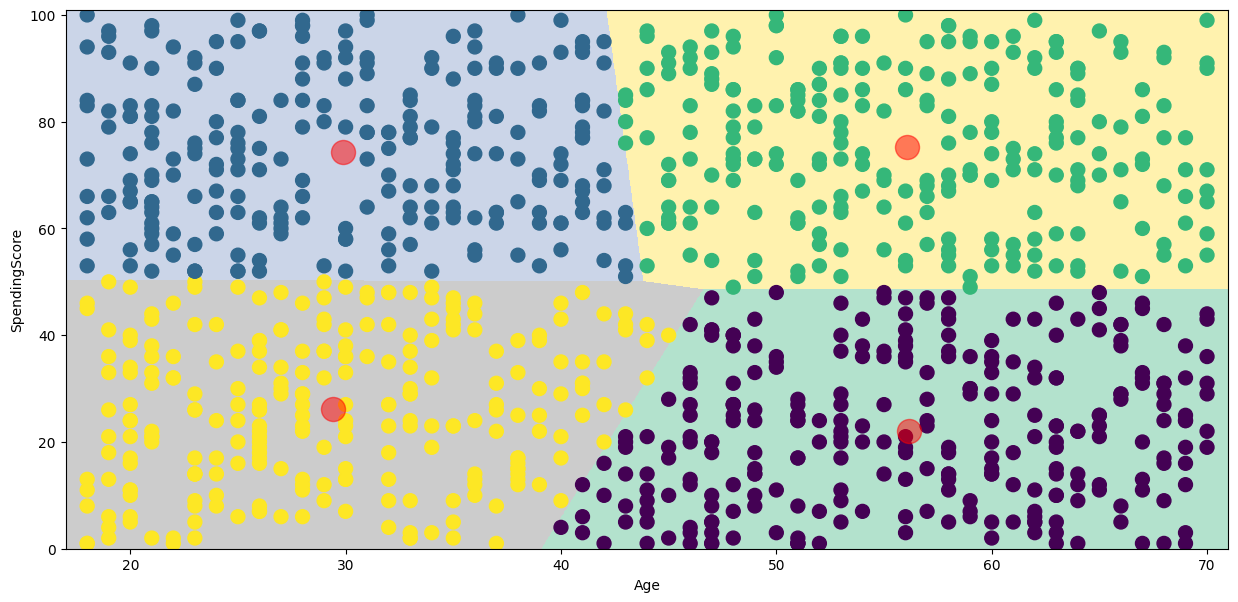

In [21]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age', y = 'SpendingScore', data = small_data, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('SpendingScore') , plt.xlabel('Age')
plt.show()

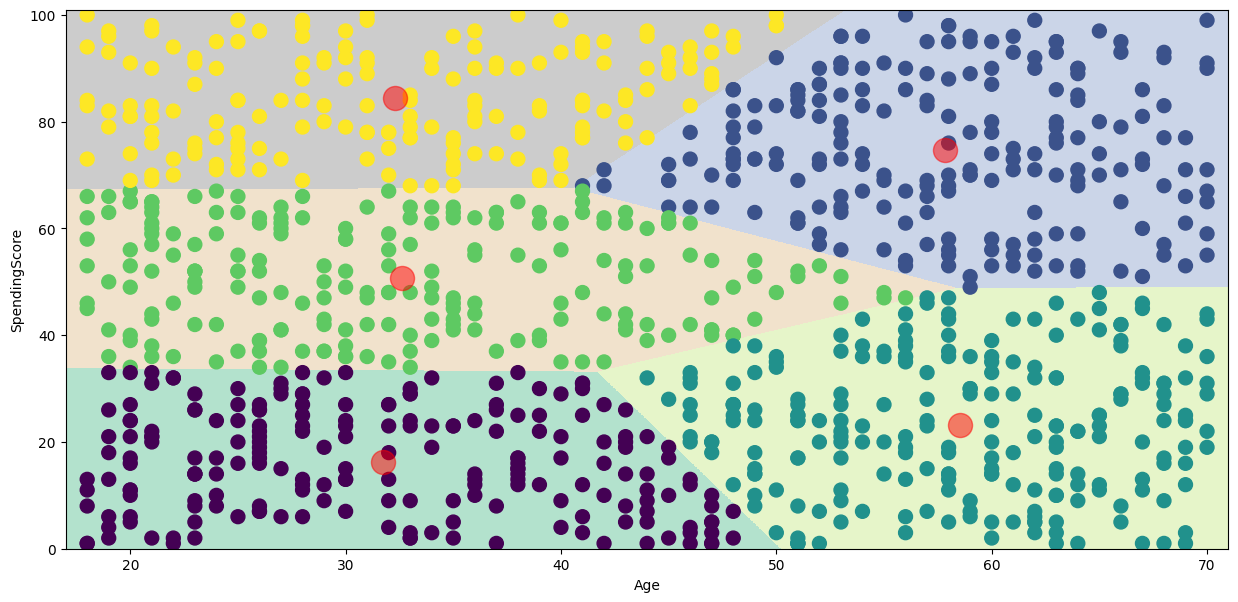

In [22]:
algorithm = (KMeans(n_clusters = 5, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 111 , algorithm='lloyd'))
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age', y = 'SpendingScore', data = small_data, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('SpendingScore') , plt.xlabel('Age')
plt.show()

In [23]:
X3 = small_data[['Age' , 'AnnualIncome' ,'SpendingScore']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 111, algorithm='lloyd'))
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

In [24]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='lloyd') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

y_kmeans = algorithm.fit_predict(X3)
small_data['cluster'] = pd.DataFrame(y_kmeans)
small_data.head()

,CustomerID,Age,Gender,AnnualIncome,SpendingScore,ProductCategory,ProductPrice,PurchaseDate,StoreID,StoreLocation,PaymentMethod,DiscountApplied,DiscountPercent,ProductCost,Profit,FootTraffic,InventoryLevel,MarketingExpenditure,CompetitorPrice,cluster
0,199001,33,Female,140281,40,Books,93.95,2021-11-25,56,Los Angeles,Debit Card,False,0,93.95,0.00,361,78,4566.98,77.19,5
1,199002,34,Male,78347,19,Clothing,519.22,2022-07-22,90,New York,Credit Card,False,0,519.22,0.00,818,15,2866.41,612.72,2
2,199003,28,Male,64653,91,Groceries,545.69,2021-10-07,54,Dallas,Debit Card,True,19,442.01,103.68,791,97,9717.52,485.58,3
3,199004,50,Female,86506,98,Health & Beauty,519.32,2021-04-15,93,New York,Debit Card,False,0,519.32,0.00,529,12,5020.93,533.17,2
4,199005,38,Female,137792,39,Electronics,247.30,2023-06-03,90,Phoenix,Mobile Payment,True,8,227.52,19.78,899,2,2795.48,221.05,5


In [ ]:
trace1 = go.Scatter3d(
    x= small_data['Age'],
    y= small_data['SpendingScore'],
    z= small_data['AnnualIncome'],
    mode='markers',
     marker=dict(
        color = small_data['cluster'], 
        size= 1,
        line=dict(
            color= small_data['cluster'],
            width= 1
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters wrt Age, Income and Spending Scores',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

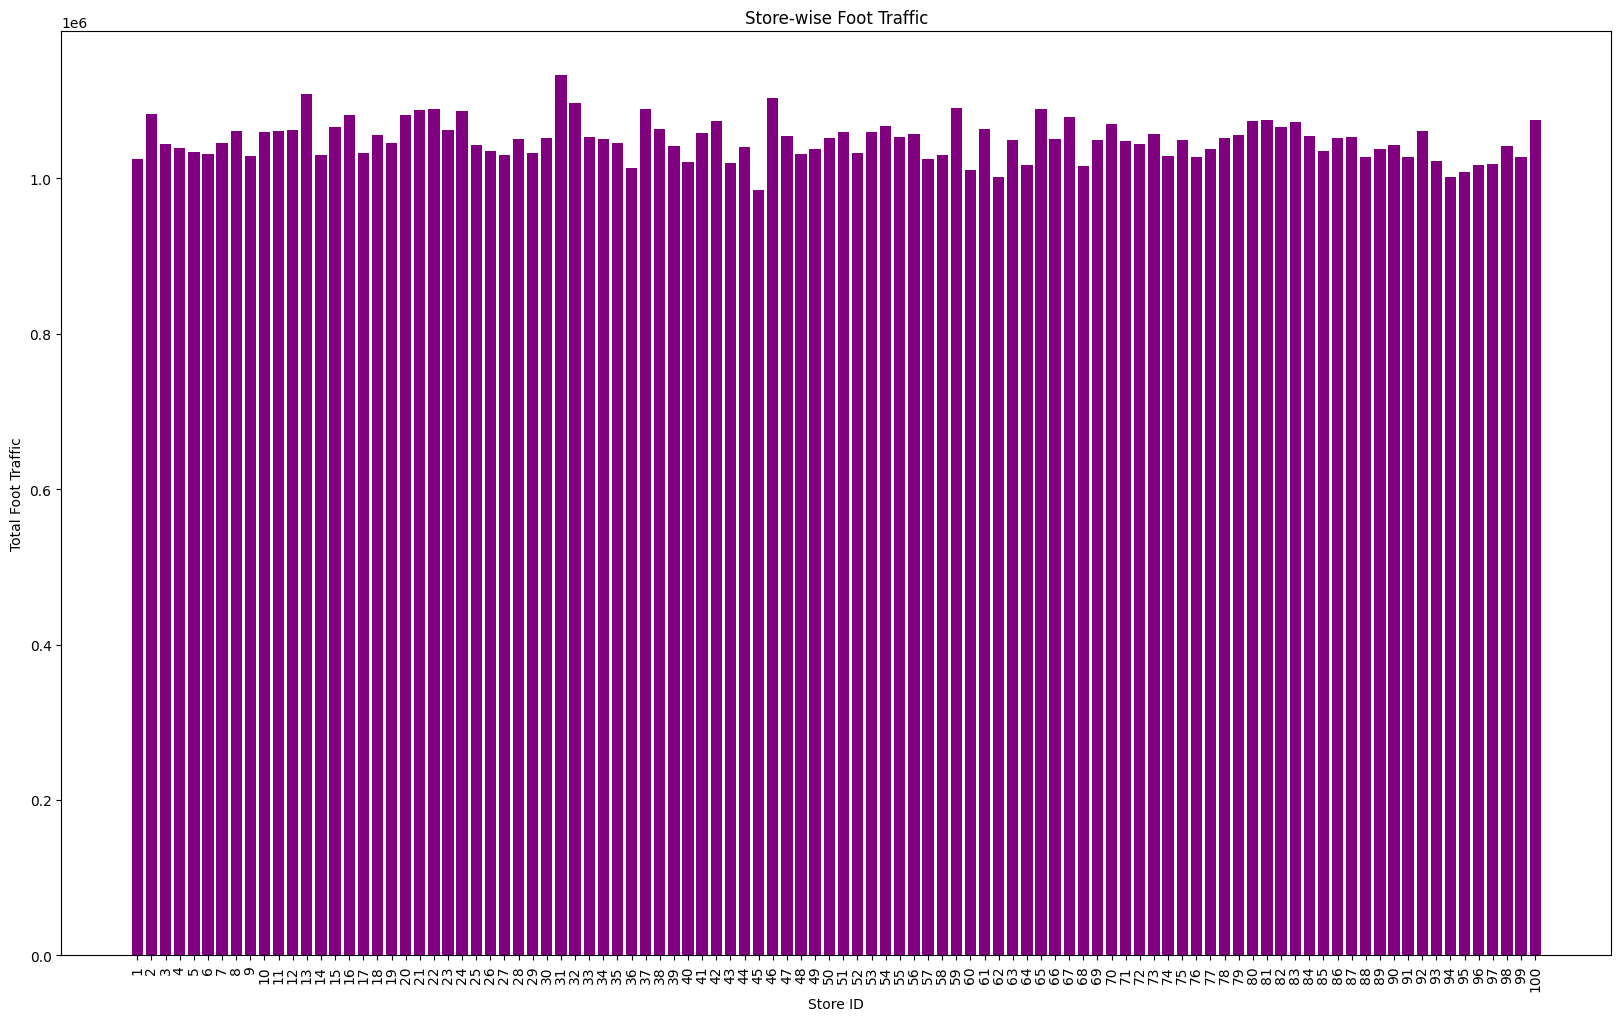

In [26]:
store_traffic = retail_data.groupby('StoreID')['FootTraffic'].sum()
plt.figure(figsize=(20, 12))
plt.bar(store_traffic.index.astype(str), store_traffic.values, color='purple')
plt.xticks(rotation=90)
plt.title("Store-wise Foot Traffic")
plt.xlabel("Store ID")
plt.ylabel("Total Foot Traffic")
plt.show()

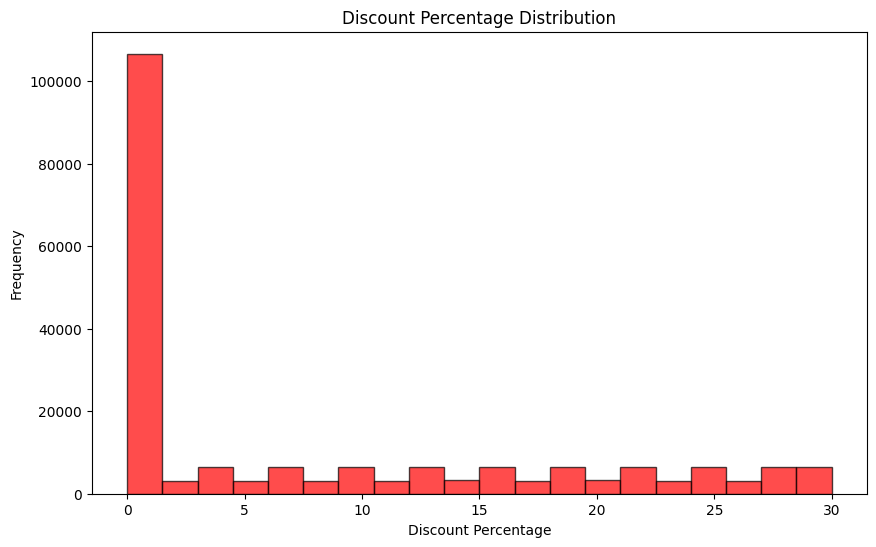

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(retail_data['DiscountPercent'], bins=20, edgecolor='black', alpha=0.7, color='red')
plt.title("Discount Percentage Distribution")
plt.xlabel("Discount Percentage")
plt.ylabel("Frequency")
plt.show()

In [28]:
anova_result = stats.f_oneway(*[retail_data[retail_data['StoreLocation'] == loc]['Profit'] for loc in retail_data['StoreLocation'].unique()])
print(f"ANOVA Test: F-stat={anova_result.statistic:.4f}, p-value={anova_result.pvalue:.4f}")

ANOVA Test: F-stat=1.2713, p-value=0.2467


In [29]:
contingency_table = pd.crosstab(retail_data['Gender'], retail_data['ProductCategory'])
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Test: Chi2-stat={chi2_stat:.4f}, p-value={p_val:.4f}")

Chi-Square Test: Chi2-stat=6.9731, p-value=0.2226


In [30]:
contingency_table

ProductCategory,Books,Clothing,Electronics,Groceries,Health & Beauty,Home & Kitchen
Gender,,,,,,
Female,16774,16609,16531,16853,16621,16615
Male,16705,16739,16849,16529,16551,16624


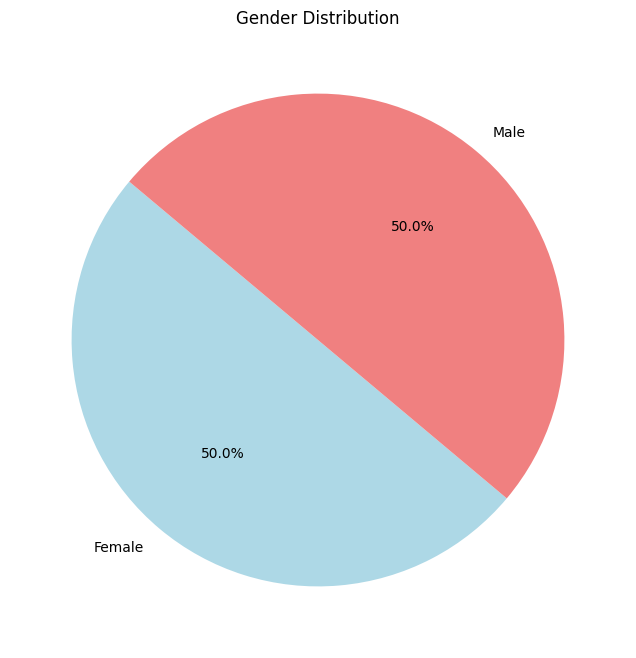

In [31]:
gender_counts = retail_data['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title("Gender Distribution")
plt.show()

<Figure size 1000x600 with 0 Axes>

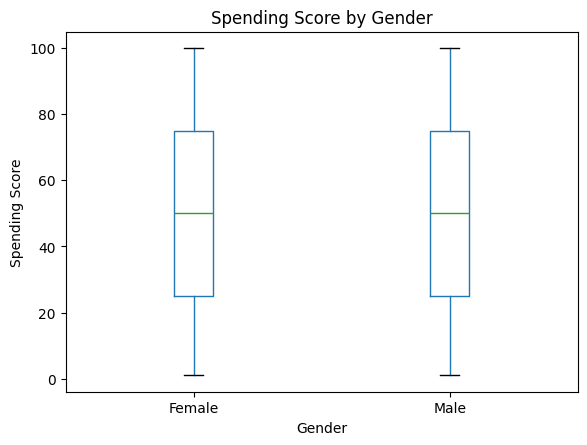

In [32]:
plt.figure(figsize=(10, 6))
retail_data.boxplot(column='SpendingScore', by='Gender', grid=False)
plt.title("Spending Score by Gender")
plt.suptitle("")
plt.xlabel("Gender")
plt.ylabel("Spending Score")
plt.show()

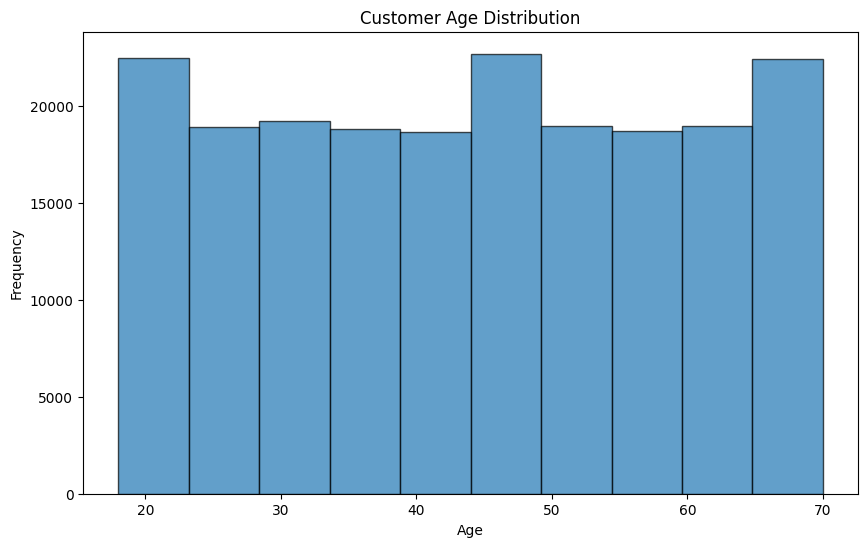

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(retail_data['Age'],edgecolor='black', alpha=0.7)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

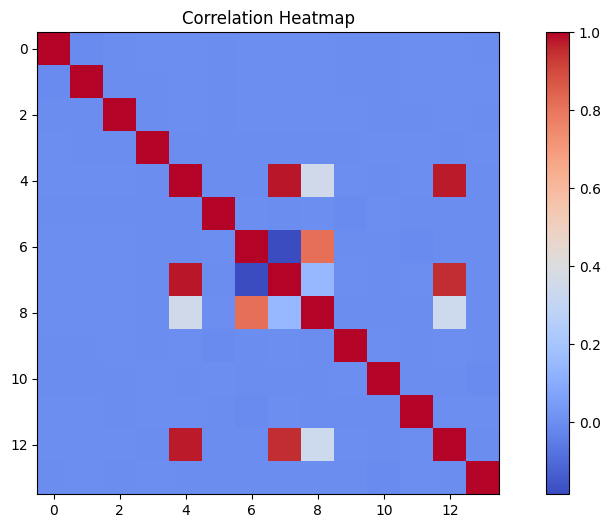

In [34]:
plt.figure(figsize=(12, 6))
numeric_data = retail_data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title("Correlation Heatmap")
plt.show()

/tmp/ipykernel_6852/919390961.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



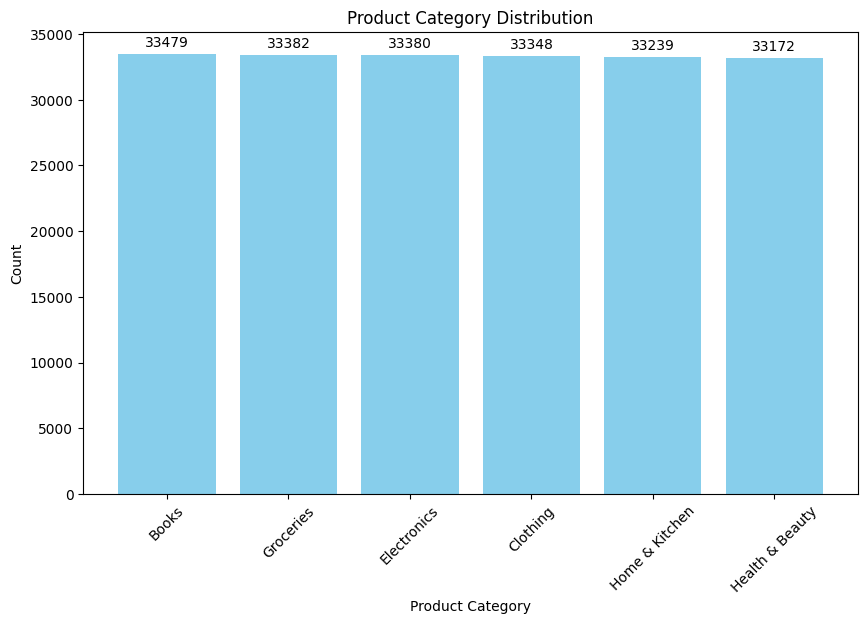

In [35]:
product_counts = retail_data['ProductCategory'].value_counts()
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(product_counts.index, product_counts.values, color='skyblue')

# Add value labels on top of the bars
ax.bar_label(bars, labels=[round(y, 0) for y in product_counts.values], padding=3)
# ax.set_ticks()
ax.set_xticklabels(product_counts.index, rotation=45)
ax.set_title("Product Category Distribution")
ax.set_xlabel("Product Category")
ax.set_ylabel("Count")
plt.show()

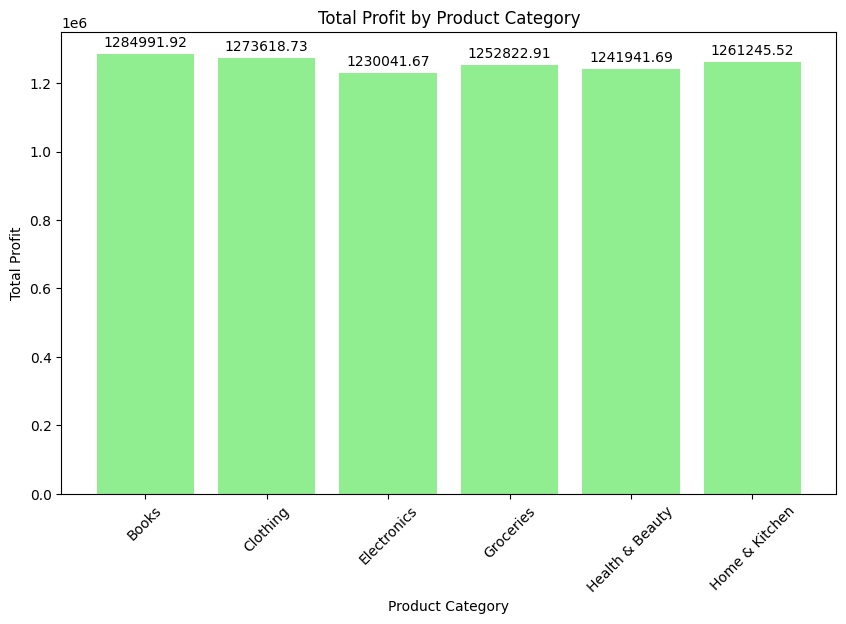

In [36]:
# Group by 'ProductCategory' and sum the 'Profit'
profit_by_category = retail_data.groupby('ProductCategory')['Profit'].sum()

# Plot the profit by category
plt.figure(figsize=(10, 6))
bars = plt.bar(profit_by_category.index, profit_by_category.values, color='lightgreen')

# Add value labels on top of the bars
plt.bar_label(bars, labels=[round(y, 2) for y in profit_by_category.values], padding=3)

plt.xticks(rotation=45)
plt.title("Total Profit by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Profit")
plt.show()


In [38]:
no_discount = retail_data[retail_data['DiscountApplied'] == False]['ProductPrice']
discounted = retail_data[retail_data['DiscountApplied'] == True]['ProductPrice']
t_stat, p_val = stats.ttest_ind(no_discount, discounted)
print(f"T-Test Results: t-stat={t_stat:.4f}, p-value={p_val:.4f}")

T-Test Results: t-stat=1.5982, p-value=0.1100


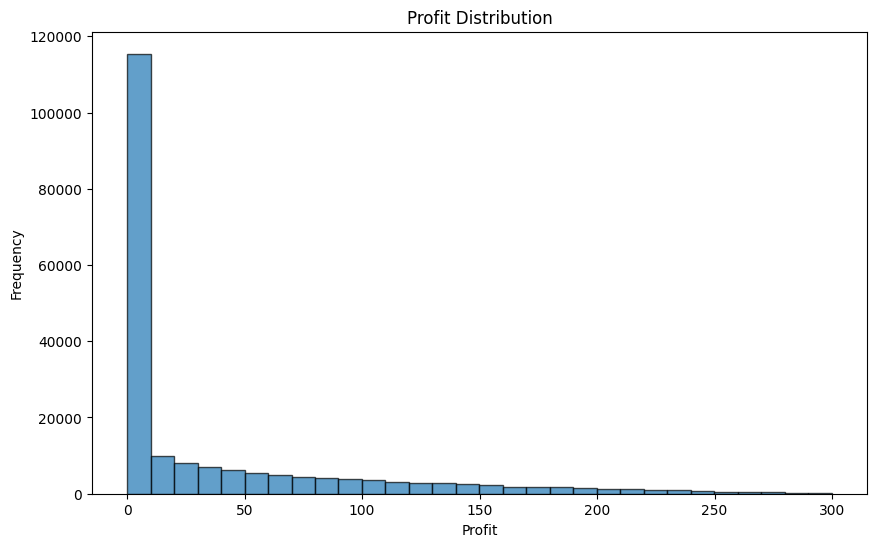

In [39]:
plt.figure(figsize=(10, 6))
plt.hist(retail_data['Profit'], bins=30, edgecolor='black', alpha=0.7)
plt.title("Profit Distribution")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

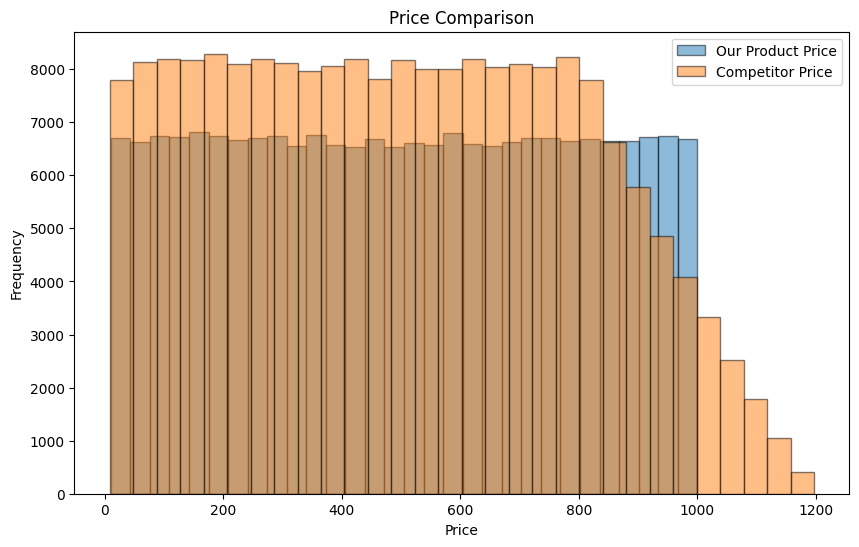

In [40]:
plt.figure(figsize=(10, 6))
plt.hist(retail_data['ProductPrice'], bins=30, alpha=0.5, label='Our Product Price', edgecolor='black')
plt.hist(retail_data['CompetitorPrice'], bins=30, alpha=0.5, label='Competitor Price', edgecolor='black')
plt.legend()
plt.title("Price Comparison")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

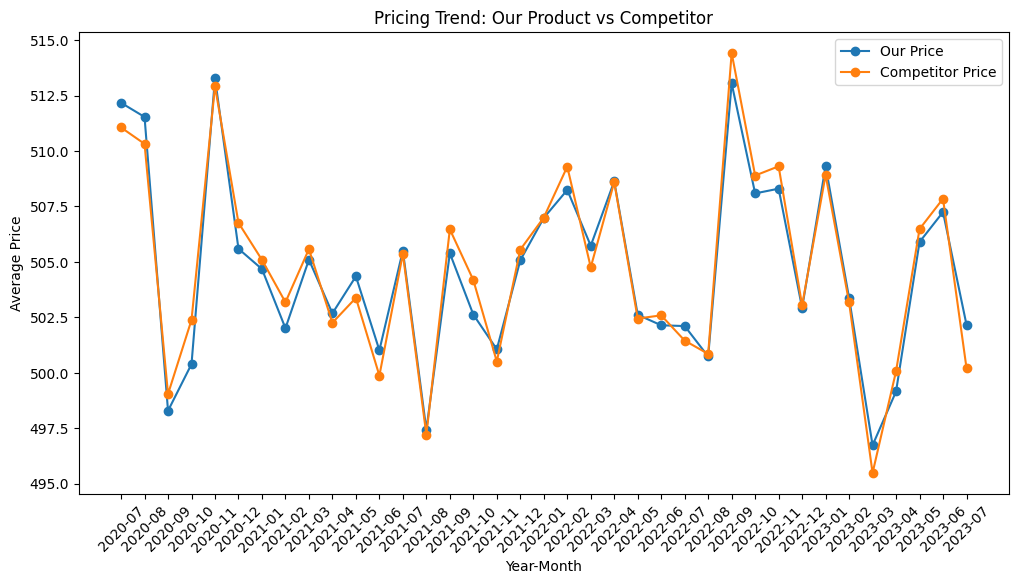

In [41]:
retail_data['YearMonth'] = retail_data['PurchaseDate'].dt.to_period('M')
monthly_prices = retail_data.groupby('YearMonth').agg({'ProductPrice': 'mean', 'CompetitorPrice': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_prices['YearMonth'].astype(str), monthly_prices['ProductPrice'], label="Our Price", marker='o')
plt.plot(monthly_prices['YearMonth'].astype(str), monthly_prices['CompetitorPrice'], label="Competitor Price", marker='o')
plt.xticks(rotation=45)
plt.title("Pricing Trend: Our Product vs Competitor")
plt.xlabel("Year-Month")
plt.ylabel("Average Price")
plt.legend()
plt.show()


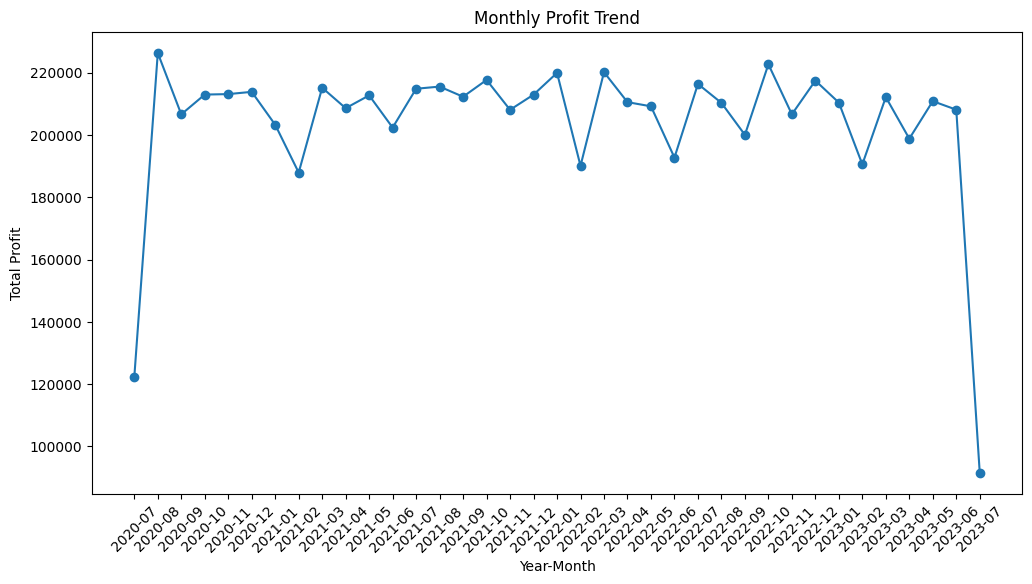

In [42]:
retail_data['YearMonth'] = retail_data['PurchaseDate'].dt.to_period('M')
retail_data_grouped = retail_data.groupby('YearMonth').agg({'Profit': 'sum'}).reset_index()
retail_data_grouped['YearMonth'] = retail_data_grouped['YearMonth'].astype(str)
plt.figure(figsize=(12, 6))
plt.plot(retail_data_grouped['YearMonth'], retail_data_grouped['Profit'], marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Profit Trend")
plt.xlabel("Year-Month")
plt.ylabel("Total Profit")
plt.show()

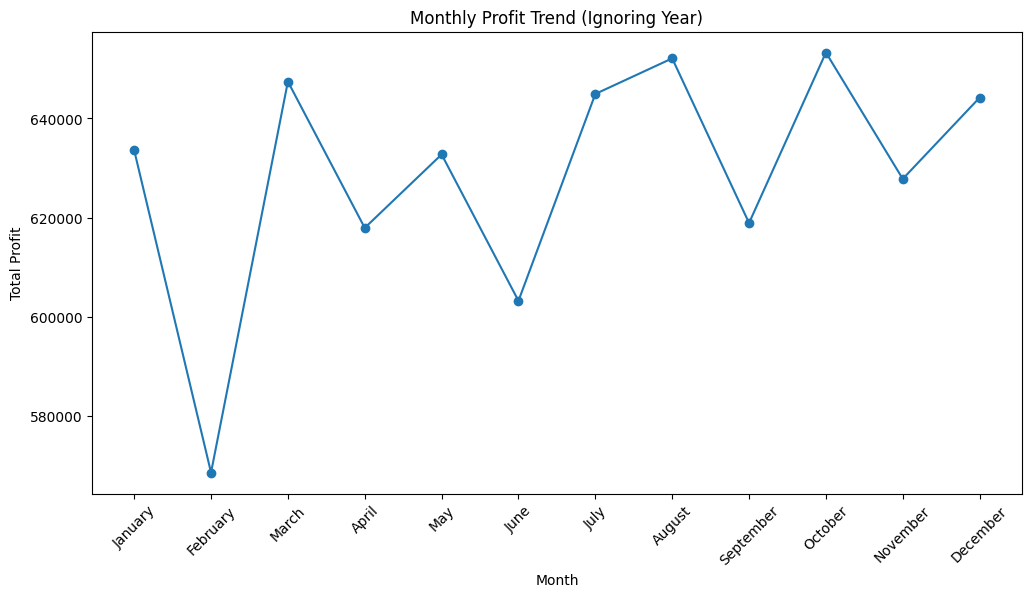

In [43]:
# Group by Month, then aggregate the profit
retail_data_grouped = retail_data.groupby('Month').agg({'Profit': 'sum'}).reset_index()

# Reorder months in calendar order
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
retail_data_grouped['Month'] = pd.Categorical(retail_data_grouped['Month'], categories=months_order, ordered=True)
retail_data_grouped = retail_data_grouped.sort_values('Month')

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(retail_data_grouped['Month'], retail_data_grouped['Profit'], marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Profit Trend (Ignoring Year)")
plt.xlabel("Month")
plt.ylabel("Total Profit")
plt.show()

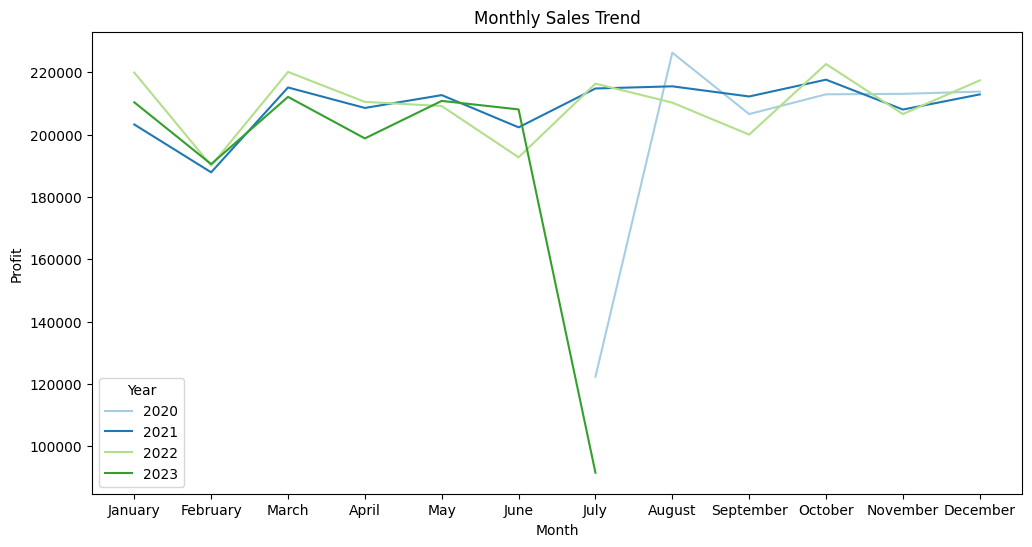

In [44]:
# createa a dataframe called monthly sales using groupby function in pandas
monthly_sales = retail_data.groupby(['Year', 'Month'])['Profit'].sum().reset_index()
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=months_order, ordered=True)
monthly_sales = monthly_sales.sort_values('Month')

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='Month', y='Profit', hue="Year", palette='Paired')
plt.title('Monthly Sales Trend')
plt.show()

# Walmart Retail Dataset

In [51]:
#Reference : https://www.kaggle.com/datasets/saadabdurrazzaq/walmart-retail-data
walmart_data = pd.read_csv("walmart_retail_data.csv")

In [52]:
walmart_data.head()

,City,Customer Age,Customer Name,Customer Segment,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,...,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price,Zip Code
0,McKeesport,NaN,Jessica Myrick,Small Business,0.10,1,2012-01-01,28774,High,32,...,-111.80,East,4031,180.36,2012-01-02,Regular Air,4.69,Pennsylvania,5.98,15131
1,Bowie,NaN,Matt Collister,Home Office,0.08,1,2012-01-01,13729,Not Specified,9,...,-342.91,East,1914,872.48,2012-01-03,Express Air,35.00,Maryland,95.99,20715
2,Napa,NaN,Alan Schoenberger,Corporate,0.00,1,2012-01-02,37537,Low,4,...,-193.08,West,5272,1239.06,2012-01-02,Delivery Truck,48.80,California,291.73,94559
3,Montebello,NaN,Elizabeth Moffitt,Consumer,0.08,1,2012-01-02,44069,Critical,43,...,247.79,West,6225,614.80,2012-01-02,Regular Air,1.97,California,15.04,90640
4,Napa,NaN,Alan Schoenberger,Corporate,0.07,1,2012-01-02,37537,Low,43,...,-1049.85,West,5273,4083.19,2012-01-04,Delivery Truck,45.00,California,100.98,94559


In [ ]:
# Load dataset
df = pd.read_csv("walmart_retail_data.csv")

# Remove NaN values in 'Order Priority' BEFORE mapping
df = df.dropna(subset=["Order Priority"])

# Encode the ordinal target variable
order_priority_mapping = {"Critical": 1, "High": 2, "Medium": 3, "Low": 4}
df["Order Priority"] = df["Order Priority"].map(order_priority_mapping)

# Drop NaN values again in case some categories were not mapped
df = df.dropna(subset=["Order Priority"])

# Define independent and dependent variables (NO sm.add_constant)
X = df[["Discount", "Order Quantity", "Sales", "Profit", "Shipping Cost"]]
y = df["Order Priority"]

# Fit ordinal logistic regression model
model = OrderedModel(y, X, distr="logit")
result = model.fit(method='bfgs')

# Print model summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 1.385152
         Iterations: 33
         Function evaluations: 40
         Gradient evaluations: 40
                             OrderedModel Results                             
Dep. Variable:         Order Priority   Log-Likelihood:                -9317.9
Model:                   OrderedModel   AIC:                         1.865e+04
Method:            Maximum Likelihood   BIC:                         1.871e+04
Date:                Wed, 05 Feb 2025                                         
Time:                        14:19:08                                         
No. Observations:                6727                                         
Df Residuals:                    6719                                         
Df Model:                           5                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

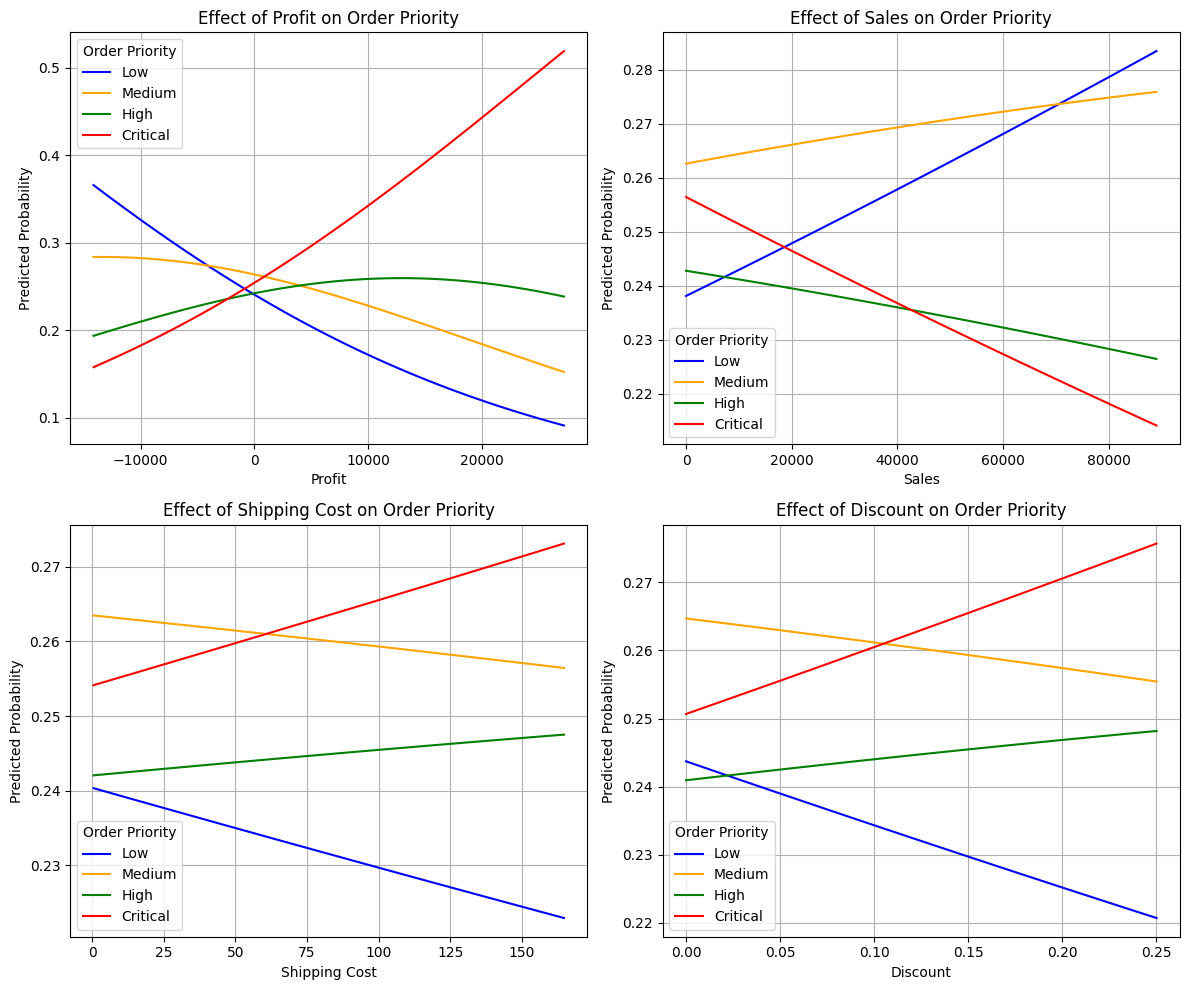

Effect of Shipping on Order Priority: 

Increase in shipping cost denotes increase in priority. Medium and High prices
don't follow this trend. 

Strategy for Shipping: 

Shipping cost of medium can be aimed to reduce to increase the priority of the
order. Medium priority order's shipping cost can be reduced and saved budget can
be directed towards shipping of High priority orders, to ensure faster and safer
shipping. 



In [ ]:
# Define features to plot
features = ["Profit", "Sales", "Shipping Cost", "Discount"]
priority_labels = ["Low", "Medium", "High", "Critical"]  # Corrected labels
colors = ['blue', 'orange', 'green', 'red']  # Colors for priority levels

# Create subplots for each feature
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten for easy iteration

for idx, feature in enumerate(features):
    feature_range = np.linspace(df[feature].min(), df[feature].max(), 100)

    # Create test dataset using mean values for other features
    X_test = X.mean().to_frame().T  # Take the mean of all predictors
    X_test = X_test.loc[X_test.index.repeat(len(feature_range))]  # Repeat for predictions
    X_test[feature] = feature_range  # Vary only the selected feature

    # Get predicted probabilities
    pred_probs = result.predict(X_test).to_numpy()

    # Plot probability curves
    ax = axes[idx]
    for i in range(pred_probs.shape[1]):
        ax.plot(feature_range, pred_probs[:, i], label=priority_labels[i], color=colors[i])

    ax.set_xlabel(feature)
    ax.set_ylabel("Predicted Probability")
    ax.set_title(f"Effect of {feature} on Order Priority")
    ax.legend(title="Order Priority")
    ax.grid(True)

# Define the text with explicit newlines for paragraphs
text = """Effect of Shipping on Order Priority:\n
Increase in shipping cost denotes increase in priority. Medium and High prices don't follow this trend.\n\nStrategy for Shipping:\n
Shipping cost of medium can be aimed to reduce to increase the priority of the order. Medium priority order's shipping cost can be reduced and saved budget can be directed towards shipping of High priority orders, to ensure faster and safer shipping."""

# Split text into paragraphs and apply wrapping to each one
wrapped_paragraphs = [textwrap.fill(para, width=80) for para in text.split("\n\n")]

# Print the wrapped text
plt.tight_layout()
plt.show()

# Print each wrapped paragraph with an extra newline
for para in wrapped_paragraphs:
    print(para, "\n")  # Adding "\n" ensures a new blank line after each paragraph

In [55]:
print("Effect of Profit on Order Priority: By the graph we can understand that as the profit increases, the order priority also increases as indicated by their predicted probability.\n\nEffect of Sales on Order Priority: By the graph we can understand that as the sales increases, lower priority orders produce more sales. This can be due to the larger number of lower priority orders\n\nEffect of Shipping on Order Priority: Increase in shipping cost denotes increase in priority. Medium and High prices don't follow this trend. Shipping cost of medium can be aimed to reduce to increase the priority of the order. Medium priority order's shipping cost can be reduced and saved budget can be directed towards shipping of High priority orders, to ensure faster and safer shipping.\n\nEffect of Discount on Order Priority: By the graph we can understand that as the discount increases, the order priority also increases. Discounts can be adjusted in accordance to sales which will lead to increase in overall sales")

Effect of Profit on Order Priority: By the graph we can understand that as the profit increases, the order priority also increases as indicated by their predicted probability.

Effect of Sales on Order Priority: By the graph we can understand that as the sales increases, lower priority orders produce more sales. This can be due to the larger number of lower priority orders

Effect of Shipping on Order Priority: Increase in shipping cost denotes increase in priority. Medium and High prices don't follow this trend. Shipping cost of medium can be aimed to reduce to increase the priority of the order. Medium priority order's shipping cost can be reduced and saved budget can be directed towards shipping of High priority orders, to ensure faster and safer shipping.

Effect of Discount on Order Priority: By the graph we can understand that as the discount increases, the order priority also increases. Discounts can be adjusted in accordance to sales which will lead to increase in overall sales

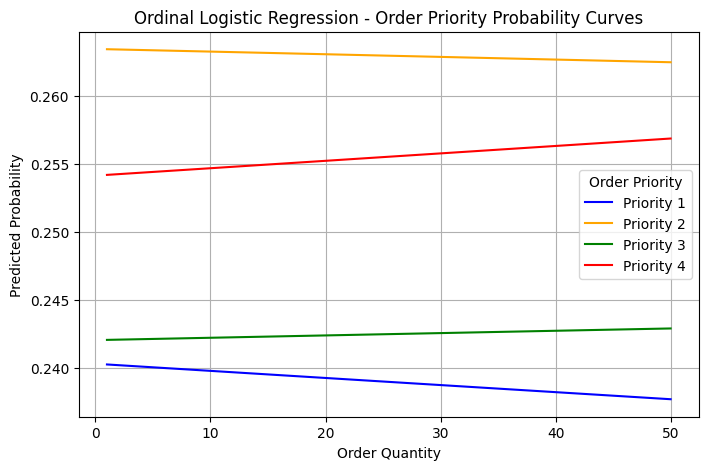

In [56]:
# Generate a range of values for Order Quantity
order_qty_range = np.linspace(df["Order Quantity"].min(), df["Order Quantity"].max(), 100)

# Create a test dataset using the mean values for other variables
X_test = X.mean().to_frame().T  # Take the mean of all predictors
X_test = X_test.loc[X_test.index.repeat(len(order_qty_range))]  # Repeat row for predictions
X_test["Order Quantity"] = order_qty_range  # Change Order Quantity

# Get predicted probabilities and convert to NumPy array
pred_probs = result.predict(X_test).to_numpy()

# Plot the probability curves for each priority level
plt.figure(figsize=(8, 5))
colors = ['blue', 'orange', 'green', 'red']  # Define colors for each category

for i in range(pred_probs.shape[1]):
    plt.plot(order_qty_range, pred_probs[:, i], label=f'Priority {i+1}', color=colors[i])

plt.xlabel("Order Quantity")
plt.ylabel("Predicted Probability")
plt.title("Ordinal Logistic Regression - Order Priority Probability Curves")
plt.legend(title="Order Priority")
plt.grid(True)
plt.show()


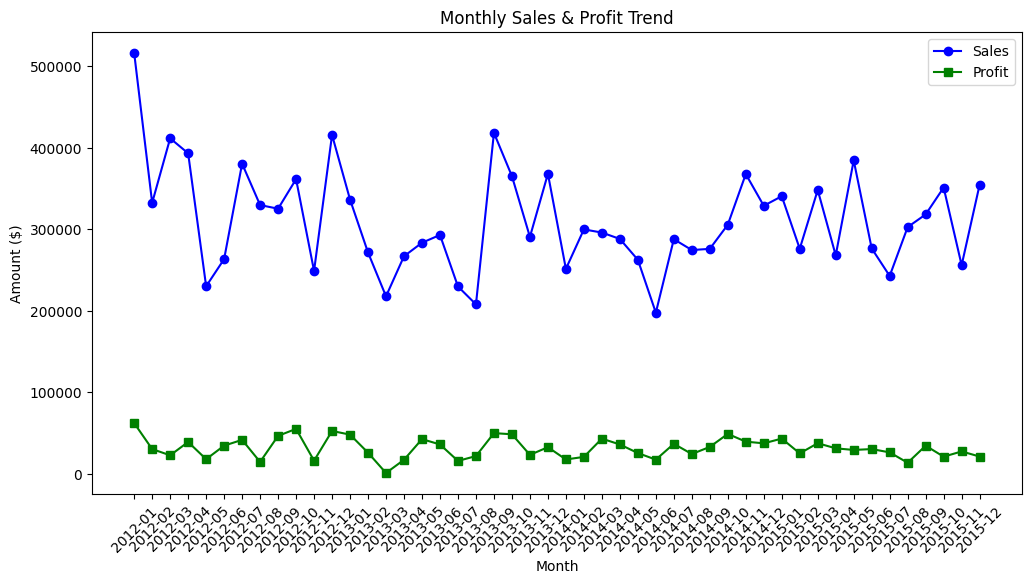

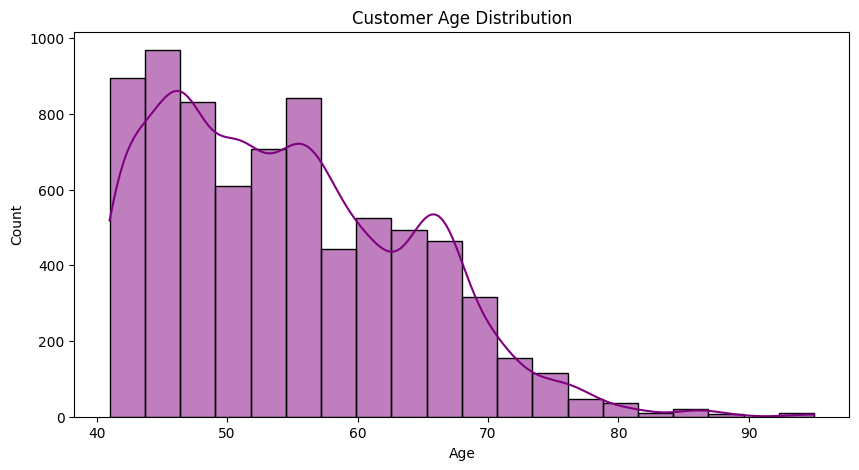

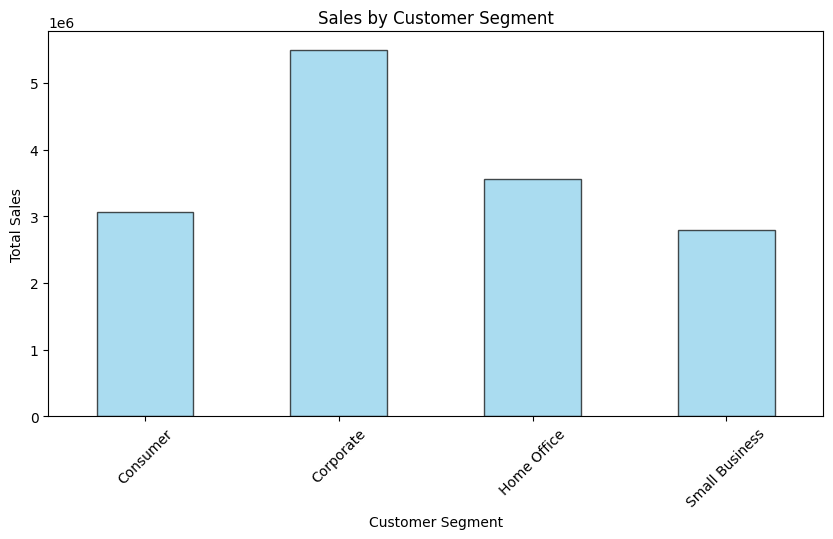

<Figure size 1200x600 with 0 Axes>

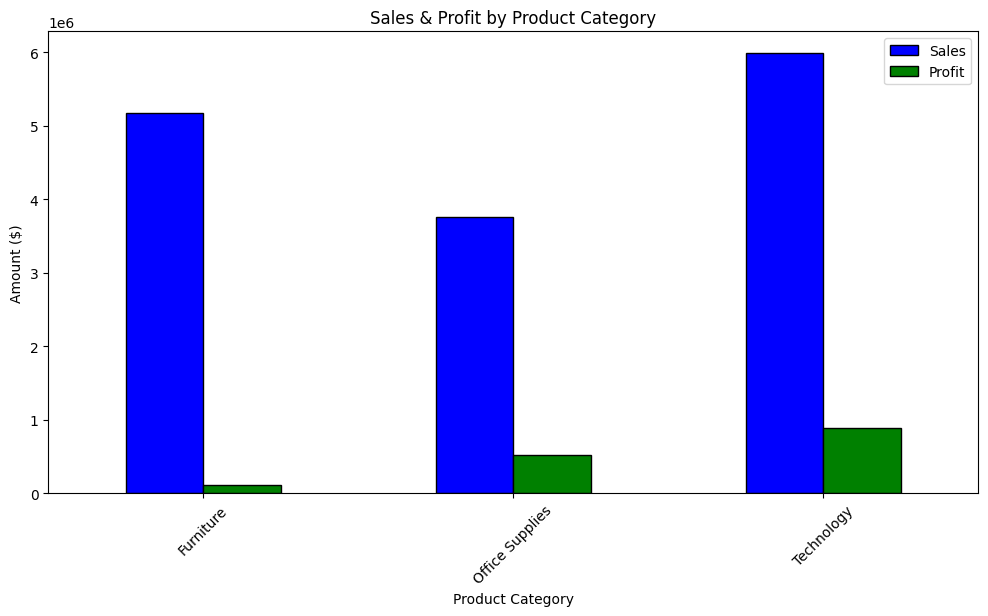

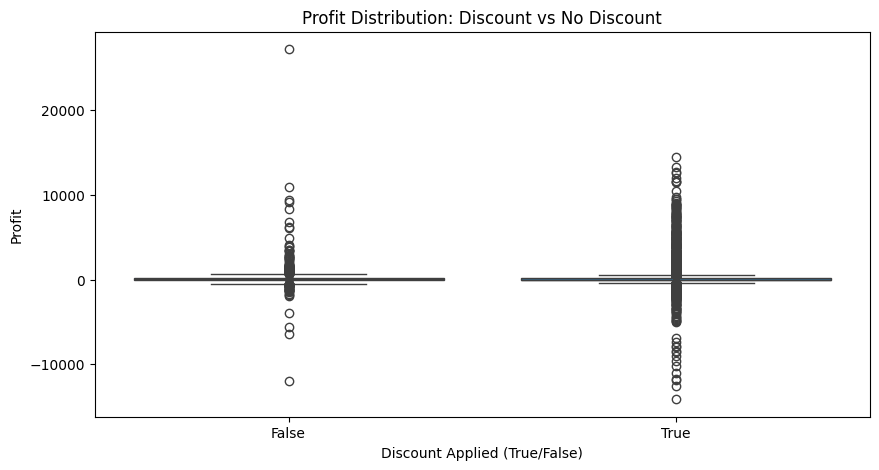

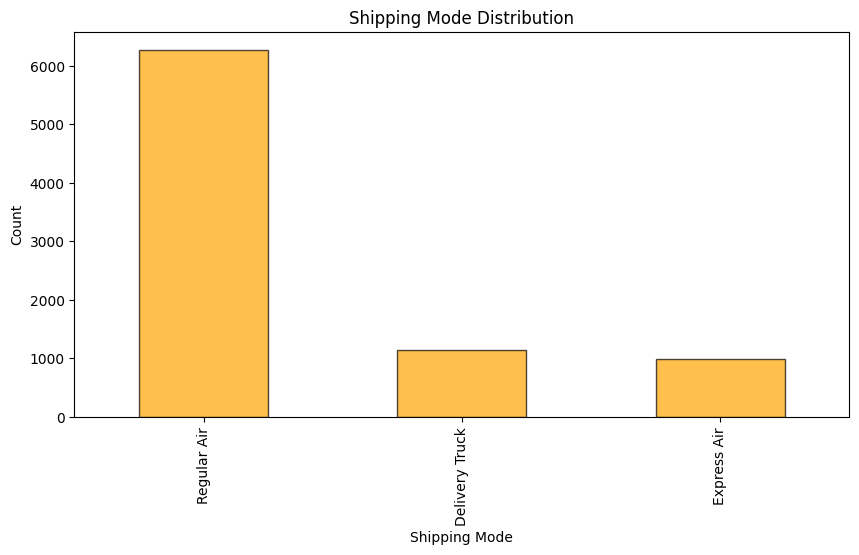

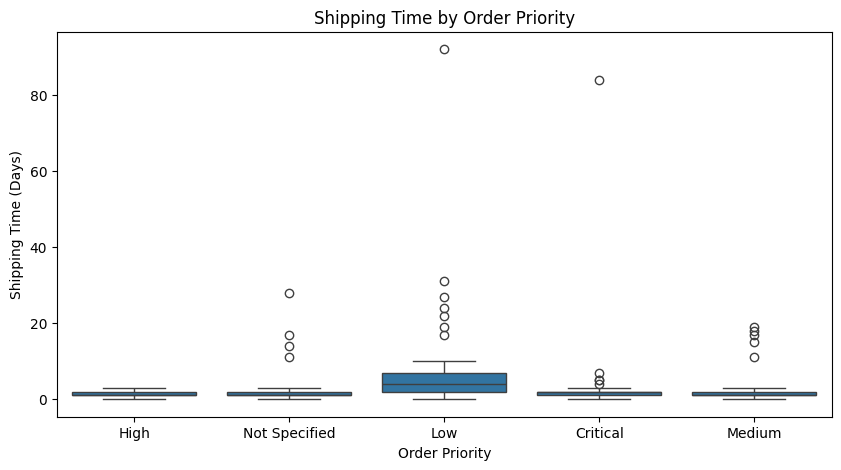

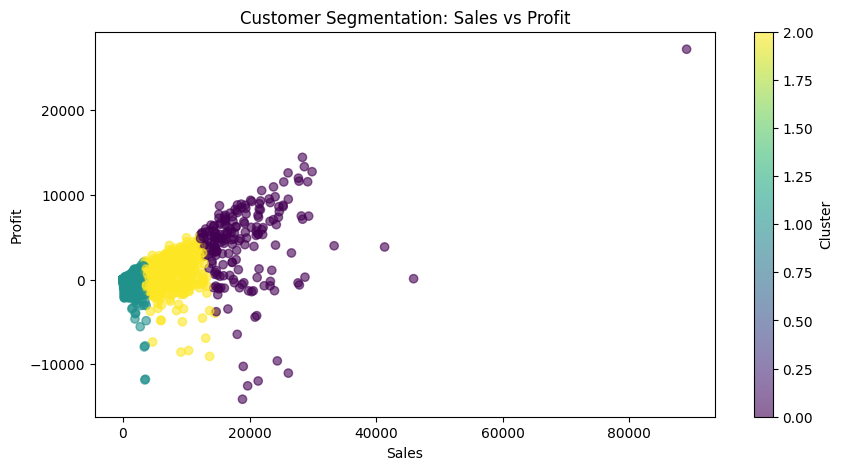

/tmp/ipykernel_6852/4105143764.py:103: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




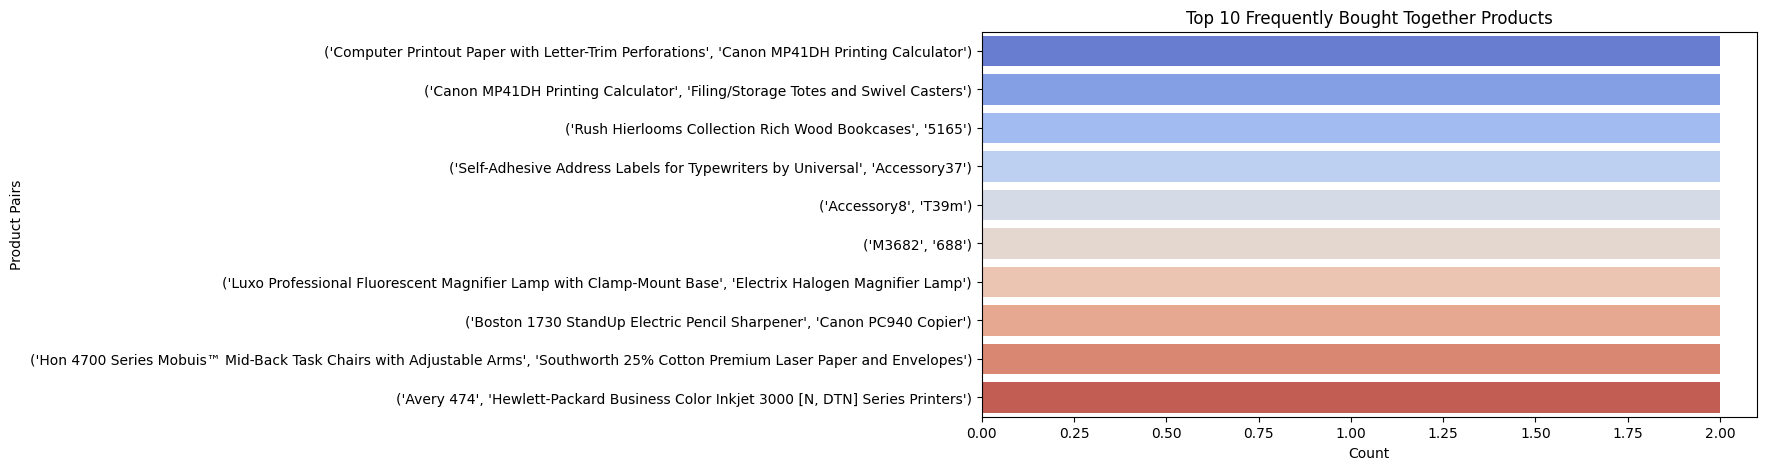

T-Test Results: t-stat=1.6318, p-value=0.1027


In [57]:
# Load data
df = pd.read_csv('walmart_retail_data.csv')

# Convert date columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Create a new column for shipping time
df['Shipping Time (Days)'] = (df['Ship Date'] - df['Order Date']).dt.days

### 1️⃣ Sales & Profit Trends Over Time
df_grouped = df.groupby(df['Order Date'].dt.to_period("M")).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
df_grouped['Order Date'] = df_grouped['Order Date'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(df_grouped['Order Date'], df_grouped['Sales'], marker='o', label='Sales', color='blue')
plt.plot(df_grouped['Order Date'], df_grouped['Profit'], marker='s', label='Profit', color='green')
plt.xticks(rotation=45)
plt.title("Monthly Sales & Profit Trend")
plt.xlabel("Month")
plt.ylabel("Amount ($)")
plt.legend()
plt.show()

### 2️⃣ Customer Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Customer Age'].dropna(), bins=20, kde=True, color='purple')
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### 3️⃣ Sales & Profit by Customer Segment
plt.figure(figsize=(10, 5))
df.groupby('Customer Segment')['Sales'].sum().plot(kind='bar', color='skyblue', alpha=0.7, edgecolor='black')
plt.title("Sales by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

### 4️⃣ Product Category-wise Sales & Profit
plt.figure(figsize=(12, 6))
df.groupby('Product Category').agg({'Sales': 'sum', 'Profit': 'sum'}).plot(kind='bar', figsize=(12, 6), color=['blue', 'green'], edgecolor='black')
plt.title("Sales & Profit by Product Category")
plt.ylabel("Amount ($)")
plt.xlabel("Product Category")
plt.xticks(rotation=45)
plt.legend(["Sales", "Profit"])
plt.show()

### 5️⃣ Discount Impact on Profit
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Discount'] > 0, y=df['Profit'])
plt.title("Profit Distribution: Discount vs No Discount")
plt.xlabel("Discount Applied (True/False)")
plt.ylabel("Profit")
plt.show()

### 6️⃣ Shipping Mode Analysis
plt.figure(figsize=(10, 5))
df['Ship Mode'].value_counts().plot(kind='bar', color='orange', alpha=0.7, edgecolor='black')
plt.title("Shipping Mode Distribution")
plt.xlabel("Shipping Mode")
plt.ylabel("Count")
plt.show()

### 7️⃣ Shipping Time vs Order Priority
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Order Priority'], y=df['Shipping Time (Days)'])
plt.title("Shipping Time by Order Priority")
plt.xlabel("Order Priority")
plt.ylabel("Shipping Time (Days)")
plt.show()

### 8️⃣ Customer Segmentation using K-Means
df_cluster = df[['Sales', 'Profit']].dropna()
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(df_cluster)

plt.figure(figsize=(10, 5))
plt.scatter(df_cluster['Sales'], df_cluster['Profit'], c=df_cluster['Cluster'], cmap='viridis', alpha=0.6)
plt.title("Customer Segmentation: Sales vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.colorbar(label="Cluster")
plt.show()

### 9️⃣ Market Basket Analysis - Frequently Bought Together
order_products = df.groupby('Order ID')['Product Name'].apply(list)

item_pairs = []
for products in order_products:
    item_pairs.extend(combinations(products, 2))

pair_counts = Counter(item_pairs)
top_pairs = pd.DataFrame(pair_counts.most_common(10), columns=['Item Pair', 'Count'])

plt.figure(figsize=(10, 5))
sns.barplot(y=top_pairs['Item Pair'].astype(str), x=top_pairs['Count'], palette='coolwarm')
plt.title("Top 10 Frequently Bought Together Products")
plt.xlabel("Count")
plt.ylabel("Product Pairs")
plt.show()

### 🔟 T-Test: Discount Effect on Profit
profit_no_discount = df[df['Discount'] == 0]['Profit']
profit_with_discount = df[df['Discount'] > 0]['Profit']

t_stat, p_val = stats.ttest_ind(profit_no_discount, profit_with_discount)
print(f"T-Test Results: t-stat={t_stat:.4f}, p-value={p_val:.4f}")



In [58]:
# import numpy as np
from scipy.stats import ttest_ind

# Randomly select two unique zip codes
random_zips = np.random.choice(df['Zip Code'].unique(), size=2, replace=False)
zip_1, zip_2 = random_zips[0], random_zips[1]

# Get sales data for these zip codes
sales_zip1 = df[df['Zip Code'] == zip_1]['Sales']
sales_zip2 = df[df['Zip Code'] == zip_2]['Sales']

# Perform T-Test
t_stat, p_value = ttest_ind(sales_zip1, sales_zip2, equal_var=True, nan_policy='omit')

print(f"T-Test (Sales in Zip Codes {zip_1} vs {zip_2}): t-stat={t_stat:.4f}, p-value={p_value:.4f}")

if p_value > 0.05:
    print("Fail to reject H₀: No significant difference in sales between these zip codes.")
else:
    print("Reject H₀: Significant difference in sales between these zip codes.")
#45324 vs 76148

T-Test (Sales in Zip Codes 1545 vs 2886): t-stat=nan, p-value=nan
Reject H₀: Significant difference in sales between these zip codes.


/home/mrudul/ml/lib/python3.10/site-packages/scipy/stats/_stats_py.py:6194: RuntimeWarning:

invalid value encountered in scalar divide



In [59]:
from scipy.stats import f_oneway

# Select profit data for different product containers
containers = df['Product Container'].unique()
container_profits = [df[df['Product Container'] == c]['Profit'] for c in containers]

# Perform ANOVA
anova_stat, p_value = f_oneway(*container_profits)

print(f"ANOVA Test (Profit Across Product Containers): F-stat={anova_stat:.4f}, p-value={p_value:.4f}")

if p_value > 0.05:
    print("Fail to reject H₀: No significant difference in profit across product containers.")
else:
    print("Reject H₀: Significant difference in profit across product containers.")


ANOVA Test (Profit Across Product Containers): F-stat=22.1040, p-value=0.0000
Reject H₀: Significant difference in profit across product containers.


In [60]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(df['Order Priority'], df['Ship Mode'])

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Test (Order Priority vs. Shipping Mode): χ²-stat={chi2_stat:.4f}, p-value={p_value:.4f}")

if p_value > 0.05:
    print("Fail to reject H₀: Order Priority and Shipping Mode are independent.")
else:
    print("Reject H₀: There is a relationship between Order Priority and Shipping Mode.")


Chi-Square Test (Order Priority vs. Shipping Mode): χ²-stat=8.1343, p-value=0.4205
Fail to reject H₀: Order Priority and Shipping Mode are independent.
